In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.utils import plot_model
import warnings
warnings.filterwarnings("ignore")

In [67]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration', 'Model Year', 'Origin']
df = pd.read_csv("auto-mpg.data", names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)

In [68]:
df = df.drop(["Origin"], axis=1)

In [76]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [78]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [100]:
model = Sequential([
    Dense(64, activation='relu', input_shape=[6]),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1)
])

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.RMSprop(0.001), metrics=['mae', 'mse'])

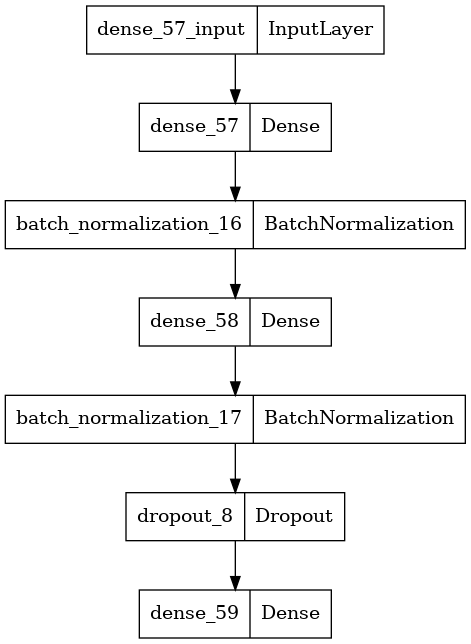

In [120]:
plot_model(model)

In [121]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 64)                448       
                                                                 
 batch_normalization_16 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_58 (Dense)            (None, 64)                4160      
                                                                 
 batch_normalization_17 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_59 (Dense)            (None, 1)               

In [101]:
history = model.fit(train_dataset, train_labels, epochs=100, validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 1s 28ms/step - loss: 575.4595 - mae: 23.0716 - mse: 575.4595 - val_loss: 1764.6431 - val_mae: 41.7899 - val_mse: 1764.6431
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 562.2242 - mae: 23.0516 - mse: 562.2242 - val_loss: 1347.2594 - val_mae: 36.3984 - val_mse: 1347.2594
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 548.2117 - mae: 22.8884 - mse: 548.2117 - val_loss: 1195.9952 - val_mae: 34.2465 - val_mse: 1195.9952
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 546.8500 - mae: 22.8732 - mse: 546.8500 - val_loss: 1088.9209 - val_mae: 32.6206 - val_mse: 1088.9209
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 539.9568 - mae: 22.7810 - mse: 539.9568 - val_loss: 1006.9600 - val_mae: 31.2970 - val_mse: 1006.9600
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 537.4284 - mae: 22.7056 - mse: 537.4284 - val_loss: 999.6852 - 

8/8 [==============================] - 0s 5ms/step - loss: 172.9974 - mae: 12.4873 - mse: 172.9974 - val_loss: 223.6808 - val_mae: 14.3340 - val_mse: 223.6808
Epoch 49/100
8/8 [==============================] - 0s 5ms/step - loss: 164.7021 - mae: 11.9700 - mse: 164.7021 - val_loss: 145.3008 - val_mae: 11.3815 - val_mse: 145.3008
Epoch 50/100
8/8 [==============================] - 0s 5ms/step - loss: 151.9418 - mae: 11.6613 - mse: 151.9418 - val_loss: 163.8955 - val_mae: 12.1256 - val_mse: 163.8955
Epoch 51/100
8/8 [==============================] - 0s 8ms/step - loss: 141.7981 - mae: 11.1564 - mse: 141.7981 - val_loss: 146.1302 - val_mae: 11.2514 - val_mse: 146.1302
Epoch 52/100
8/8 [==============================] - 0s 5ms/step - loss: 135.6143 - mae: 10.8701 - mse: 135.6143 - val_loss: 156.1415 - val_mae: 11.4616 - val_mse: 156.1415
Epoch 53/100
8/8 [==============================] - 0s 6ms/step - loss: 135.5758 - mae: 10.7094 - mse: 135.5758 - val_loss: 152.8441 - val_mae: 11.5122 -

8/8 [==============================] - 0s 5ms/step - loss: 23.1687 - mae: 3.6859 - mse: 23.1687 - val_loss: 171.1665 - val_mae: 10.8251 - val_mse: 171.1665
Epoch 98/100
8/8 [==============================] - 0s 6ms/step - loss: 20.0002 - mae: 3.5562 - mse: 20.0002 - val_loss: 104.7871 - val_mae: 8.4329 - val_mse: 104.7871
Epoch 99/100
8/8 [==============================] - 0s 5ms/step - loss: 22.3190 - mae: 3.6073 - mse: 22.3190 - val_loss: 28.6223 - val_mae: 4.3574 - val_mse: 28.6223
Epoch 100/100
8/8 [==============================] - 0s 5ms/step - loss: 23.1921 - mae: 3.6544 - mse: 23.1921 - val_loss: 98.3597 - val_mae: 8.0796 - val_mse: 98.3597


In [102]:
loss, mae, mse = model.evaluate(test_dataset, test_labels)

3/3 [==============================] - 0s 2ms/step - loss: 83.4486 - mae: 7.5394 - mse: 83.4486


In [103]:
print("Mean Squared Error:", mse)

Mean Squared Error: 83.44857788085938


In [104]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,mae,mse,val_loss,val_mae,val_mse
0,575.459473,23.071640,575.459473,1764.643066,41.789852,1764.643066
1,562.224243,23.051636,562.224243,1347.259399,36.398376,1347.259399
2,548.211670,22.888355,548.211670,1195.995239,34.246521,1195.995239
3,546.850037,22.873201,546.850037,1088.920898,32.620590,1088.920898
4,539.956787,22.781033,539.956787,1006.959961,31.296972,1006.959961


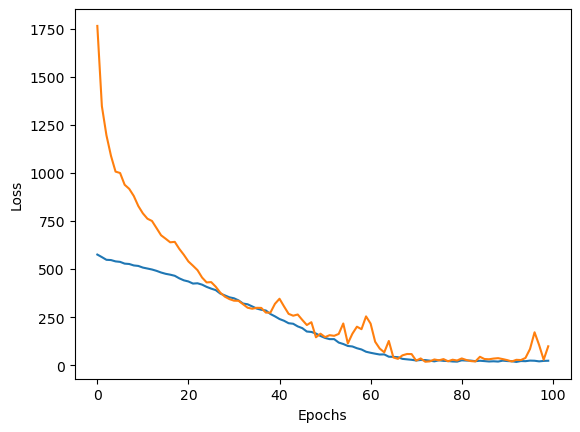

In [107]:
plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

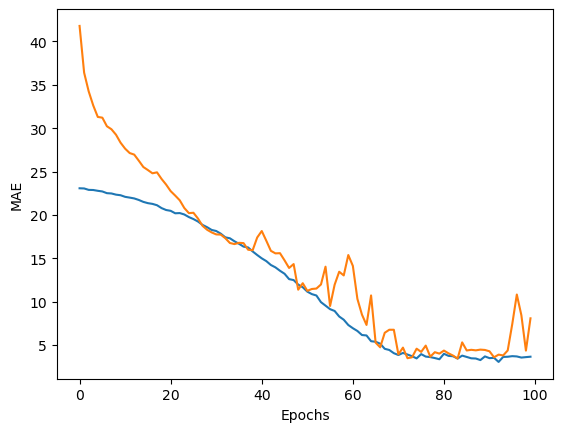

In [108]:
plt.figure()
plt.plot(history.history["mae"])
plt.plot(history.history["val_mae"])
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.show()

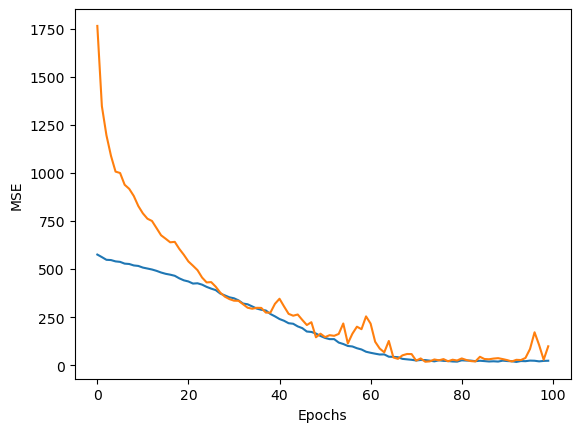

In [109]:
plt.figure()
plt.plot(history.history["mse"])
plt.plot(history.history["val_mse"])
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.show()

In [110]:
model.save("fuel.h5")

In [116]:
test = np.array([[8, 307.0, 130, 3504, 12.0, 70]])
res = model.predict(test)

1/1 [==============================] - 0s 26ms/step


In [117]:
print(res)

[[22.437782]]


In [118]:
type(res)

numpy.ndarray

In [119]:
res[0][0]

22.437782